In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv(r"G:\Practice_code\recomendad\amazon.csv")
df.head(5)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,Shipping Weight
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,10.7 pounds
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...",10.69 pounds
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,10.5 pounds
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,3.9 pounds
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,7.36 pounds


In [3]:
print(df.shape)
df.info()

(29, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           29 non-null     object 
 1   product_name         29 non-null     object 
 2   category             29 non-null     object 
 3   discounted_price     29 non-null     object 
 4   actual_price         29 non-null     object 
 5   discount_percentage  29 non-null     object 
 6   rating               29 non-null     float64
 7   rating_count         29 non-null     object 
 8   about_product        29 non-null     object 
 9   Shipping Weight      29 non-null     object 
dtypes: float64(1), object(9)
memory usage: 2.4+ KB


In [4]:
df.describe()

,rating
count,29.000000
mean,4.165517
std,0.177836
min,3.700000
25%,4.000000
50%,4.200000
75%,4.300000
max,4.500000


In [5]:
df.duplicated(keep=False).sum()
df= df.drop_duplicates(keep='first',inplace= False)

In [6]:
df.duplicated(keep=False).sum()


0

In [7]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
Shipping Weight        0
dtype: int64

In [8]:
df= df.dropna()

df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
Shipping Weight        0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 28
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           29 non-null     object 
 1   product_name         29 non-null     object 
 2   category             29 non-null     object 
 3   discounted_price     29 non-null     object 
 4   actual_price         29 non-null     object 
 5   discount_percentage  29 non-null     object 
 6   rating               29 non-null     float64
 7   rating_count         29 non-null     object 
 8   about_product        29 non-null     object 
 9   Shipping Weight      29 non-null     object 
dtypes: float64(1), object(9)
memory usage: 2.5+ KB


In [10]:
df['actual_price'] = df['actual_price'].str.replace('₹', '').astype('string')
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,Shipping Weight
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,10.7 pounds
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...",10.69 pounds
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,10.5 pounds
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,3.9 pounds
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,7.36 pounds


In [11]:
df= df.assign(Shipping_weight=df["Shipping Weight"].str.extract(r"(\d+\.\d+|\d+)").astype('float'))
df= df.assign(Weight_unit=df["Shipping Weight"].str.replace(r"(\d+\.\d+|\d+)",""))
df=df.drop(columns='Shipping Weight')
df.head()

C:\Users\PIUS\AppData\Local\Temp\ipykernel_19716\613543639.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df= df.assign(Weight_unit=df["Shipping Weight"].str.replace(r"(\d+\.\d+|\d+)",""))


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,Shipping_weight,Weight_unit
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,10.70,pounds
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...",10.69,pounds
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,10.50,pounds
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,3.90,pounds
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,7.36,pounds


In [12]:
df_ounce= df[df['Weight_unit']== ' ounces']
df_ounce['Shipping_weight']= df_ounce['Shipping_weight']* 0.065

df_pounds= df[df['Weight_unit']== ' pounds']

df_new= pd.concat([df_ounce, df_pounds])
df_new

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,Shipping_weight,Weight_unit
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,10.700,pounds
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...",10.690,pounds
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,10.500,pounds
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,3.900,pounds
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,7.360,pounds
5,B08Y1TFSP6,pTron Solero TB301 3A Type-C Data and Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹149,"1,000",85%,3.9,"24,871",Fast Charging & Data Sync: Solero TB301 Type-C...,722.660,pounds
6,B08WRWPM22,"boAt Micro USB 55 Tangle-free, Sturdy Micro US...",Computers&Accessories|Accessories&Peripherals|...,₹176.63,499,65%,4.1,"15,188",It Ensures High Speed Transmission And Chargin...,722.655,pounds
7,B08DDRGWTJ,MI Usb Type-C Cable Smartphone (Black),Computers&Accessories|Accessories&Peripherals|...,₹229,299,23%,4.3,"30,411",1m long Type-C USB Cable|Sturdy and Durable. W...,74.360,pounds
8,B008IFXQFU,"TP-Link USB WiFi Adapter for PC(TL-WN725N), N1...",Computers&Accessories|NetworkingDevices|Networ...,₹499,999,50%,4.2,"1,79,691",USB WiFi Adapter —— Speedy wireless transmissi...,71.000,pounds
9,B082LZGK39,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,299,33%,4.0,"43,994",Universal Compatibility – It is compatible wit...,72.300,pounds


In [13]:
split = df_new['category'].str.split("|", n=10000, expand = True)
split

,0,1,2,3,4
0,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables
1,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables
2,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables
3,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables
4,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables
5,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables
6,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables
7,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables
8,Computers&Accessories,NetworkingDevices,NetworkAdapters,WirelessUSBAdapters,None
9,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables


In [14]:
df_new["Main_Category"]= split[0] 

df_new["Sub_1"]= split[1]
 
df_new["Sub_2"]= split[2]

df_new['Sub_3']= split[3]
df_new.drop(columns =["category", "Sub_3"], inplace = True)

In [15]:
df_new

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,Shipping_weight,Weight_unit,Main_Category,Sub_1,Sub_2
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,₹399,"1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,10.700,pounds,Computers&Accessories,Accessories&Peripherals,Cables&Accessories
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,₹199,349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...",10.690,pounds,Computers&Accessories,Accessories&Peripherals,Cables&Accessories
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,₹199,"1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,10.500,pounds,Computers&Accessories,Accessories&Peripherals,Cables&Accessories
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,₹329,699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,3.900,pounds,Computers&Accessories,Accessories&Peripherals,Cables&Accessories
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,₹154,399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,7.360,pounds,Computers&Accessories,Accessories&Peripherals,Cables&Accessories
5,B08Y1TFSP6,pTron Solero TB301 3A Type-C Data and Fast Cha...,₹149,"1,000",85%,3.9,"24,871",Fast Charging & Data Sync: Solero TB301 Type-C...,722.660,pounds,Computers&Accessories,Accessories&Peripherals,Cables&Accessories
6,B08WRWPM22,"boAt Micro USB 55 Tangle-free, Sturdy Micro US...",₹176.63,499,65%,4.1,"15,188",It Ensures High Speed Transmission And Chargin...,722.655,pounds,Computers&Accessories,Accessories&Peripherals,Cables&Accessories
7,B08DDRGWTJ,MI Usb Type-C Cable Smartphone (Black),₹229,299,23%,4.3,"30,411",1m long Type-C USB Cable|Sturdy and Durable. W...,74.360,pounds,Computers&Accessories,Accessories&Peripherals,Cables&Accessories
8,B008IFXQFU,"TP-Link USB WiFi Adapter for PC(TL-WN725N), N1...",₹499,999,50%,4.2,"1,79,691",USB WiFi Adapter —— Speedy wireless transmissi...,71.000,pounds,Computers&Accessories,NetworkingDevices,NetworkAdapters
9,B082LZGK39,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,₹199,299,33%,4.0,"43,994",Universal Compatibility – It is compatible wit...,72.300,pounds,Computers&Accessories,Accessories&Peripherals,Cables&Accessories


In [16]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 28
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           29 non-null     object 
 1   product_name         29 non-null     object 
 2   discounted_price     29 non-null     object 
 3   actual_price         29 non-null     string 
 4   discount_percentage  29 non-null     object 
 5   rating               29 non-null     float64
 6   rating_count         29 non-null     object 
 7   about_product        29 non-null     object 
 8   Shipping_weight      29 non-null     float64
 9   Weight_unit          29 non-null     object 
 10  Main_Category        29 non-null     object 
 11  Sub_1                29 non-null     object 
 12  Sub_2                29 non-null     object 
dtypes: float64(2), object(10), string(1)
memory usage: 3.2+ KB


Text(0, 0.5, 'Count of products')

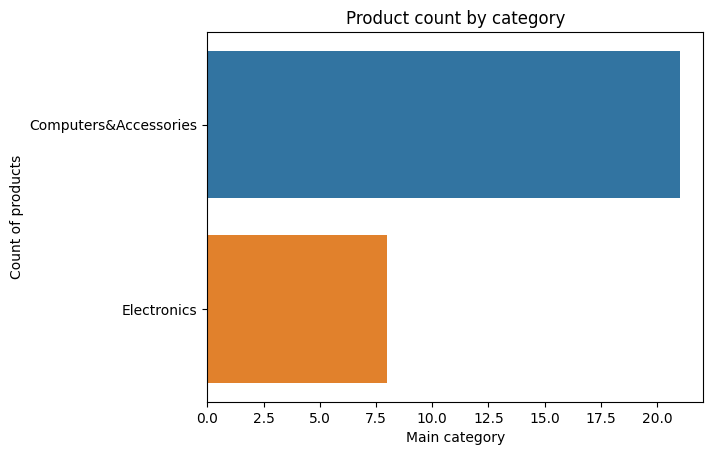

In [17]:
import seaborn as sns 
import matplotlib.pyplot as plt

order = df_new['Main_Category'].value_counts()[:10].index
sns.countplot(y='Main_Category', data=df_new, order=order)
plt.title("Product count by category")
plt.xlabel("Main category")
plt.ylabel("Count of products")

In [18]:
df= pd.read_csv(r"G:\Practice_code\recomendad\amazon.csv")

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')

df["category"] = df["category"].fillna("")

tfidf_matrix = tfidf.fit_transform(df["category"])

tfidf_matrix.shape

(29, 15)

In [20]:
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import sigmoid_kernel

linear = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
sig_score = sigmoid_kernel(tfidf_matrix, tfidf_matrix)

In [21]:
print(linear[1])
print(cosine_sim[1])
print(sig_score[1])

[1.         1.         1.         1.         1.         1.
 1.         1.         0.18126643 1.         1.         1.
 0.2619071  1.         1.         1.         0.         1.
 1.         0.         1.         0.2619071  0.         1.
 0.         0.2619071  0.         1.         1.        ]
[1.         1.         1.         1.         1.         1.
 1.         1.         0.18126643 1.         1.         1.
 0.2619071  1.         1.         1.         0.         1.
 1.         0.         1.         0.2619071  0.         1.
 0.         0.2619071  0.         1.         1.        ]
[0.78820208 0.78820208 0.78820208 0.78820208 0.78820208 0.78820208
 0.78820208 0.78820208 0.76662278 0.78820208 0.78820208 0.78820208
 0.76883015 0.78820208 0.78820208 0.78820208 0.76159416 0.78820208
 0.78820208 0.76159416 0.78820208 0.76883015 0.76159416 0.78820208
 0.76159416 0.76883015 0.76159416 0.78820208 0.78820208]


In [22]:
indices = pd.Series(df.index, index=df["product_name"])
indices

product_name
Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)                                          0
Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)           1
Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini & iOS Devices                                                                    2
boAt Deuce USB 300 2 in 1 Type-C & Micro USB Stress Resistant, Tangle-Free, Sturdy Cable with 3A Fast Charging & 480mbps Data Transmission, 10000+ Bends Lifespan and Extended 1.5m Length(Martian Red)     3
Portronics Konnect L 1.2M Fast Charging 3A 8 Pin USB Cable with Charge & Sync Function for iPhone, iPad (Grey)                                                     

In [23]:
def rec_lin(product_name, linear=linear):
    idx = indices[product_name]
    sim_scores = list(enumerate(linear[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    product_indices = [i[0] for i in sim_scores]
    return df[["product_id","product_name","actual_price"]].iloc[product_indices]

In [26]:
name = input("What would you like to search for today? ")
result = rec_lin(name)
result

What would you like to search for today? Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)


,product_id,product_name,actual_price
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,₹349
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,"₹1,899"
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,₹699
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,₹399
5,B08Y1TFSP6,pTron Solero TB301 3A Type-C Data and Fast Cha...,"₹1,000"
6,B08WRWPM22,"boAt Micro USB 55 Tangle-free, Sturdy Micro US...",₹499
7,B08DDRGWTJ,MI Usb Type-C Cable Smartphone (Black),₹299
9,B082LZGK39,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,₹299
10,B08CF3D7QR,Portronics Konnect L POR-1081 Fast Charging 3A...,₹339
11,B0789LZTCJ,boAt Rugged v3 Extra Tough Unbreakable Braided...,₹799
